<a href="https://colab.research.google.com/github/ValentynaGrach/ml-homeworks/blob/main/%D0%94%D0%97__10_Clustering%2Bdimension_reduction_ValentynaGrach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
print(os.listdir())

directory_path = "/content/"
for file_name in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)
        print("Файл", file_name, "успішно видалено.")

# Визначаємо шлях до папки
folder_path = "/content/south_german_credit"

# Перевіряємо, чи існує папка перед видаленням
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)  # Видаляємо папку з усім вмістом
    print("✅ Папка 'south_german_credit' успішно видалена!")
else:
    print("⚠ Папка не знайдена!")

# del sgc  # Повністю видаляє змінну з пам'яті

print(os.listdir())  # Переконайтесь, що 'south_german_credit' більше немає

try:
    print(sgc)
except NameError:
    print("✅ DataFrame 'sgc' успішно видалено!")

['.config', 'south+german+credit+update.zip', 'south_german_credit', 'sample_data']
Файл south+german+credit+update.zip успішно видалено.
✅ Папка 'south_german_credit' успішно видалена!
['.config', 'sample_data']
✅ DataFrame 'sgc' успішно видалено!


# 1️⃣ завантаження та первиний аналіз датасету South German Credit

In [ ]:
from google.colab import files, data_table
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [ ]:
# завантаження файлу
uploaded = files.upload()

# Отримуємо ім'я завантаженого файлу
zip_filename = list(uploaded.keys())[0]
print("Завантажений файл:", zip_filename)

Saving south+german+credit+update.zip to south+german+credit+update.zip
Завантажений файл: south+german+credit+update.zip


In [ ]:
# Вказуємо шлях до розпакування
extract_path = "/content/south_german_credit"
os.makedirs(extract_path, exist_ok=True)

# Розпаковуємо ZIP-архів
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Виводимо список файлів у папці
print("Вміст папки після розпакування:")
os.listdir(extract_path)

Вміст папки після розпакування:


['SouthGermanCredit.asc', 'codetable.txt', 'read_SouthGermanCredit.R']

In [ ]:
# 1️⃣ Завантаження даних
file_path = "/content/south_german_credit/SouthGermanCredit.asc"

# Завантажуємо датасет (пробіли як роздільники)
sgc = pd.read_csv(file_path, sep=r'\s+')

# Виведемо результат датасету
display(sgc.head(10))

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
5,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
7,1,6,4,0,1361,1,2,2,3,1,...,1,40,3,2,1,2,1,1,1,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1


##🔹 → первинний аналіз даних

In [ ]:
# 2️⃣
# Перевірка на пропуски та форматів стовпців
print("\n🔍 Перевірка на пропуски та формати стовпців в sgc:")
print(sgc.info())

# Огляд статистичних характеристик
print("\n📊 Статистичні характеристики для sgc:")
display(sgc.describe())

# перевірка на дублікати
duplicates = sgc.duplicated().sum()
print("\n🔍 Кількість дублікатів:", duplicates)

# перевірка унікальних значень в кожній колонці (щоб знайти "?" або текст у числових колонках)
print("\n🔍🔹 Унікальні значення в колонках (перші 10):")
for col in sgc.columns:
    print("\nКолонка", col, ":", sgc[col].unique()[:10])


🔍 Перевірка на пропуски та формати стовпців в sgc:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000



🔍 Кількість дублікатів: 0

🔍🔹 Унікальні значення в колонках (перші 10):

Колонка laufkont : [1 2 4 3]

Колонка laufzeit : [18  9 12 10  8  6 24 11 30 48]

Колонка moral : [4 2 3 0 1]

Колонка verw : [ 2  0  9  3  1 10  5  4  6  8]

Колонка hoehe : [1049 2799  841 2122 2171 2241 3398 1361 1098 3758]

Колонка sparkont : [1 2 3 5 4]

Колонка beszeit : [2 3 4 1 5]

Колонка rate : [4 2 3 1]

Колонка famges : [2 3 4 1]

Колонка buerge : [1 3 2]

Колонка wohnzeit : [4 2 3 1]

Колонка verm : [2 1 3 4]

Колонка alter : [21 36 23 39 38 48 40 65 24 31]

Колонка weitkred : [3 1 2]

Колонка wohn : [1 2 3]

Колонка bishkred : [1 2 3 4]

Колонка beruf : [3 2 1 4]

Колонка pers : [2 1]

Колонка telef : [1 2]

Колонка gastarb : [2 1]

Колонка kredit : [1 0]


🔹 **Аналіз отриманих результатів**
✅ **Розмір**: 1000 записів, 21 колонка.  
✅ **Відсутність пропусків**: усі колонки мають 1000 значень, тобто **немає NaN**.  
✅ **Дублікатів немає**: нам **не потрібно їх обробляти**.  
✅ **Типи змінних**:
   - **Усі змінні мають тип `int64`**, що означає, що категоріальні змінні вже представлені у числовому форматі.
   - **Числові змінні**: `laufzeit (duration)`, `hoehe (amount)`, `alter (age)`.
   - **Категоріальні змінні (кодування числом)**: усі інші.  
✅ **Цільова змінна** `credit_risk (kredit)` вже закодована як `0` (поганий кредит) і `1` (хороший).  
---

In [ ]:
# 3️⃣ Перейменування колонок
sgc.rename(columns={
    "laufkont": "status",
    "laufzeit": "duration",
    "moral": "credit_history",
    "verw": "purpose",
    "hoehe": "amount",
    "sparkont": "savings",
    "beszeit": "employment_duration",
    "rate": "installment_rate",
    "famges": "personal_status_sex",
    "buerge": "other_debtors",
    "wohnzeit": "present_residence",
    "verm": "property",
    "alter": "age",
    "weitkred": "other_installment_plans",
    "wohn": "housing",
    "bishkred": "number_credits",
    "beruf": "job",
    "pers": "people_liable",
    "telef": "telephone",
    "gastarb": "foreign_worker",
    "kredit": "credit_risk"
}, inplace=True)

print("\n✅ Колонки перейменовано! Оновлений датасет:")
display(sgc.head(10))


✅ Колонки перейменовано! Оновлений датасет:


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
5,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
7,1,6,4,0,1361,1,2,2,3,1,...,1,40,3,2,1,2,1,1,1,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1


In [ ]:
# ✅ Фінальний вивід
print("\n📌 Фінальна структура даних:")
sgc.info()
print("\n✅ Дані готові для подальшої роботи!")


📌 Фінальна структура даних:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  100

##🔹 → графічний аналіз даних

Щоб зрозуміти структуру даних та розподіл змінних, побудуємо:

*   📉 Кореляційну матрицю (heatmap)  
*   📊 Гістограми (histplot) для числових змінних
*   🔵 Крапкові графіки (stripplot) для порівняння змінних

---








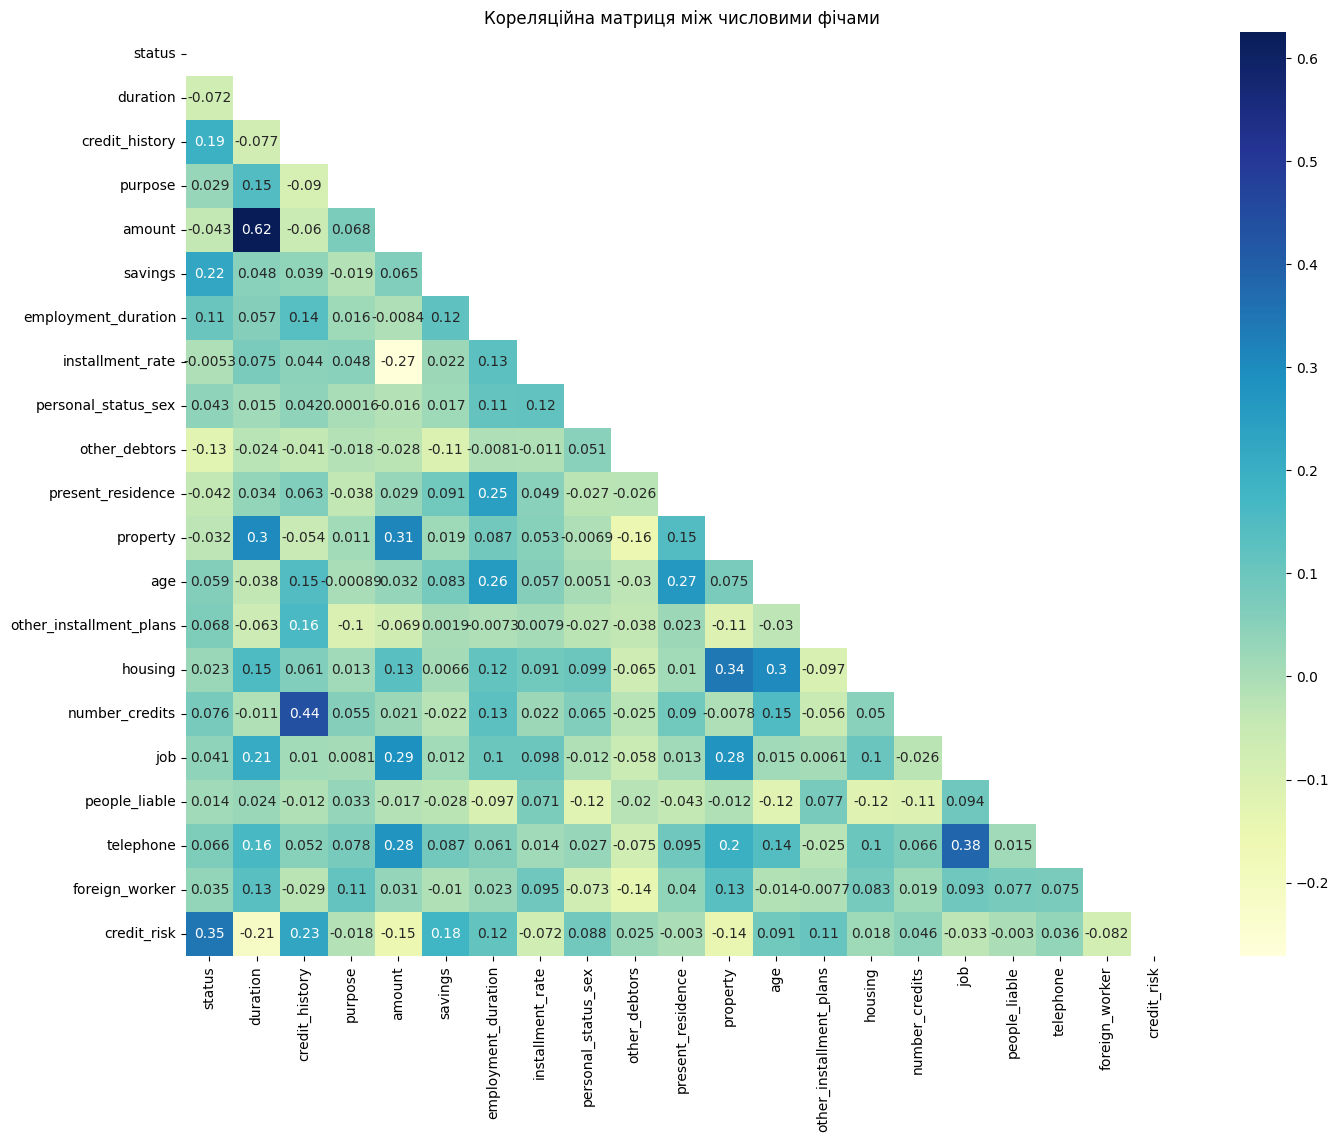

In [ ]:
# 📌 1️⃣ Кореляційна матриця
corr_matrix = sgc.select_dtypes(include=['int64']).corr()

# Візуалізація кореляційної матриці heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":10}, mask=mask)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Кореляційна матриця між числовими фічами")
plt.show()

---

🔹 **Оновлений аналіз кореляційної матриці**  

✅ **Кореляція `credit_risk` (цільова змінна) з іншими змінними**:  
1️⃣ **`status` (~ 0.35)** – чим **кращий статус рахунку**, тим **менший ризик**.  
2️⃣ **`duration` (~ -0.21)** – **чим довший кредит**, тим **вищий ризик**.  
3️⃣ **`savings` (~ 0.18)** – більше **заощаджень** = **менший ризик**.  
4️⃣ **`amount` (~ -0.15)** – **чим більша сума кредиту**, тим **вищий ризик**.  
5️⃣ **`installment_rate` (~ -0.072)** – слабка кореляція, **більший відсоток виплат = трохи вищий ризик**.  

💡 **Висновок:**  
Ключові фактори ризику: **статус рахунку, тривалість кредиту, заощадження, сума кредиту**.  

---

✅ **Сильні кореляції між ознаками (впливають одна на одну)**:  
1️⃣ **`amount` та `duration` (~ 0.62)** – **більша сума кредиту → довший термін кредиту**.  
2️⃣ **`amount` та `property` (~ 0.31)** – **люди, які мають власність, можуть брати більші кредити**.  
3️⃣ **`job` та `amount` (~ 0.29)** – **тип роботи впливає на суму кредиту**.  
4️⃣ **`number_credits` та `credit_history` (~ 0.44)** – **більше кредитів = краща кредитна історія**.  

💡 **Висновок:**  
Ці ознаки можна використовувати для **нових фіч**.

---

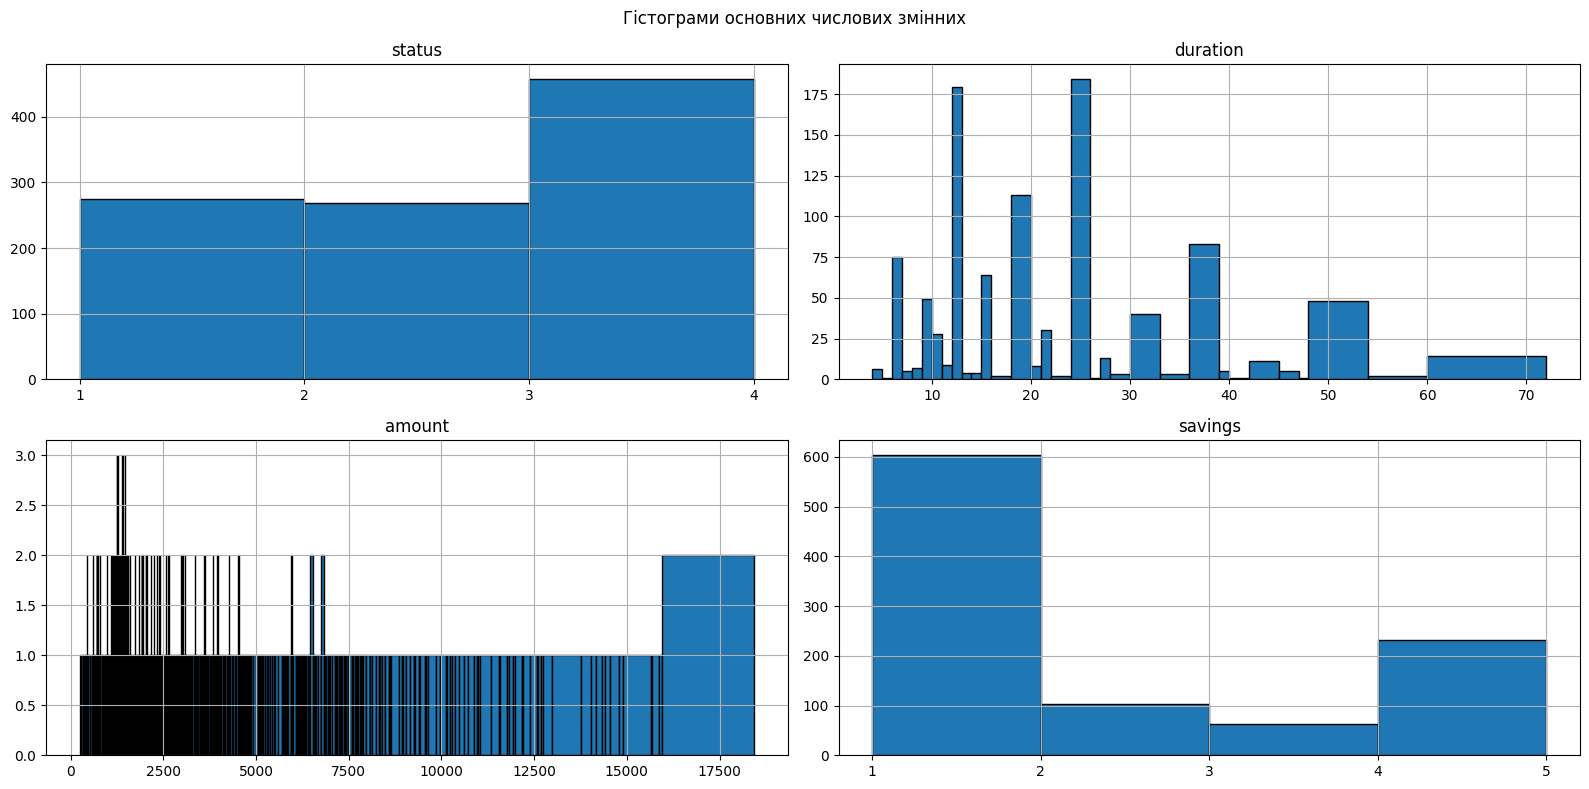

In [ ]:
# 📌 2️⃣ Гістограми для числових змінних
numerical_cols = ["status", "duration", "amount", "savings"]
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

for i, col in enumerate(numerical_cols):
    ax = axes[i//2, i%2]
    sgc[col].hist(ax=ax, bins=sorted(sgc[col].unique()), edgecolor="black")
    ax.set_title(col)
    if col in ["status", "savings"]:
        ax.set_xticks(sorted(sgc[col].unique()))

plt.suptitle("Гістограми основних числових змінних")
plt.tight_layout()
plt.show()

**Висновок:**  
Графік показує **дискретність** `status` і `savings`, **нерівномірний розподіл** `duration` та **великий розкид** `amount`. Це вказує на **необхідність масштабування** перед кластеризацією.

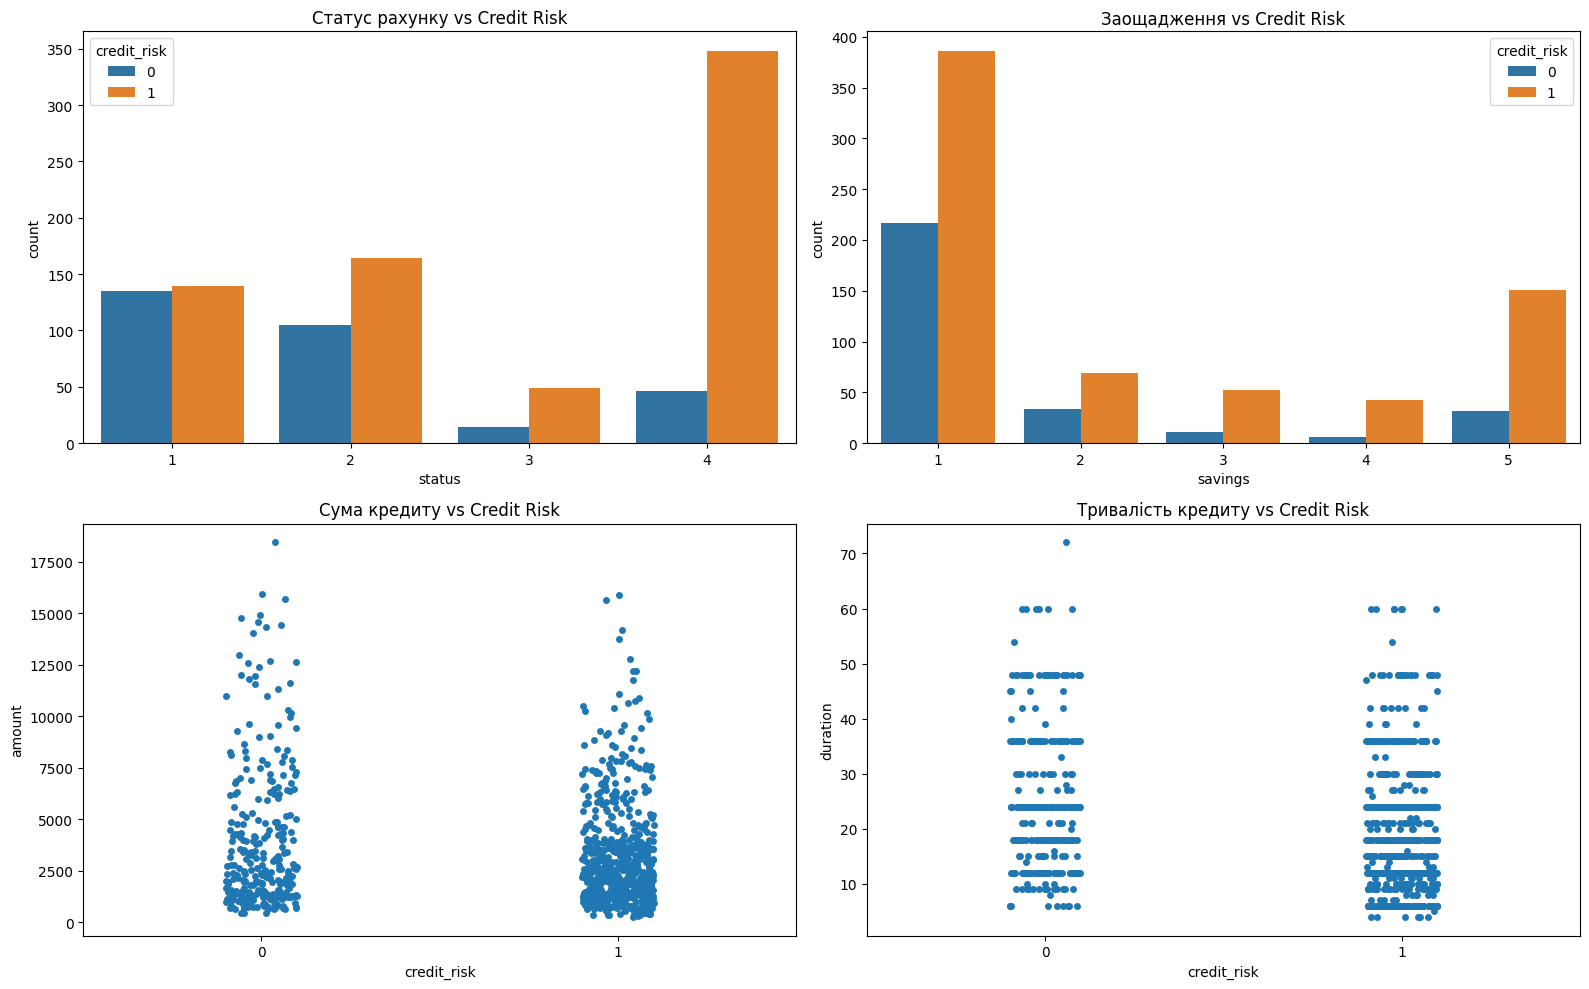

In [ ]:
# 📌 3️⃣ Countplot і stripplot для порівняння числових змінних з кредитним ризиком
plt.figure(figsize=(16, 10))

# `countplot` для категоріальних змінних
plt.subplot(2, 2, 1)
sns.countplot(x="status", hue="credit_risk", data=sgc)
plt.title("Статус рахунку vs Credit Risk")

plt.subplot(2, 2, 2)
sns.countplot(x="savings", hue="credit_risk", data=sgc)
plt.title("Заощадження vs Credit Risk")

# `boxplot` для числових змінних
plt.subplot(2, 2, 3)
sns.stripplot(x="credit_risk", y="amount", data=sgc)
plt.title("Сума кредиту vs Credit Risk")

plt.subplot(2, 2, 4)
sns.stripplot(x="credit_risk", y="duration", data=sgc)
plt.title("Тривалість кредиту vs Credit Risk")

plt.tight_layout()
plt.show()

---
✅ Висновок:  
🔹 Клієнти зі статусом рахунку `4` та високими заощадженнями (**`savings = 5`**) частіше мають низький кредитний ризик.  
🔹 Клієнти зі статусом `1` та низькими заощадженнями (**`savings = 1`**) переважно мають високий ризик.  
🔹 Розмір кредиту (`amount`) і його тривалість (`duration`) не дають чіткої межі ризику, але більші значення частіше зустрічаються у ризикових кредитах.  

---
## 🔹 → нові фічі (Feature Engineering)  
1️⃣ **financial_stability** – якщо клієнт має **високий статус рахунку (≥ 3) та значні заощадження (≥ 3)** → **низький ризик**.  
2️⃣ **high_risk_loan** – якщо кредит має **велику суму (≥ 5000) або довгий термін (≥ 36 місяців)** → **високий ризик**.  
3️⃣ **low_income_suspect** – якщо клієнт має **низький статус рахунку (1) та мінімальні заощадження (1)** → **можливі фінансові труднощі**.  

---

In [ ]:
# 📌 1️⃣ Ознака фінансової стабільності
sgc["financial_stability"] = ((sgc["status"] >= 3) & (sgc["savings"] >= 3)).astype(int)

# 📌 2️⃣ Ознака ризикового кредиту
sgc["high_risk_loan"] = ((sgc["amount"] >= 5000) | (sgc["duration"] >= 36)).astype(int)

# 📌 3️⃣ Ознака можливих фінансових труднощів
sgc["low_income_suspect"] = ((sgc["status"] == 1) & (sgc["savings"] == 1)).astype(int)

# ✅ Перевіряємо нові ознаки
print("\n✅ Нові фічі створені! Оновлений DataFrame:")
display(sgc[["financial_stability", "high_risk_loan", "low_income_suspect"]].head(10))


✅ Нові фічі створені! Оновлений DataFrame:


,financial_stability,high_risk_loan,low_income_suspect
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,0
9,0,0,0


📊✔ Перевірити кореляцію з credit_risk

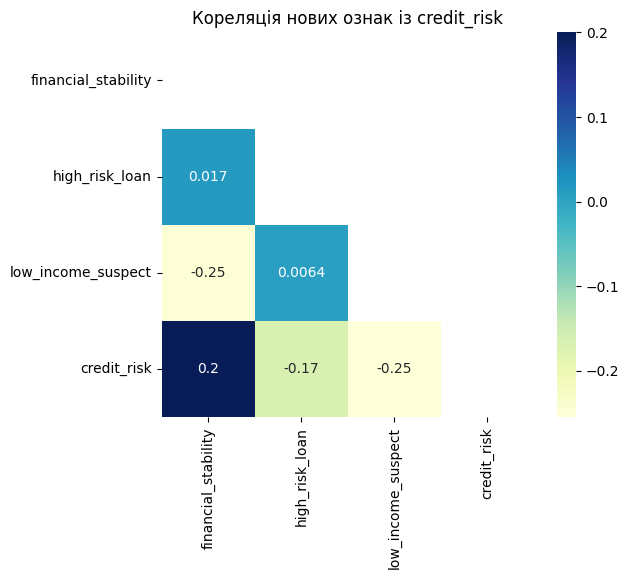

In [ ]:
# Кореляційна матриця для нових ознак і цільової змінної
correlation_features = ["financial_stability", "high_risk_loan", "low_income_suspect", "credit_risk"]
corr_matrix = sgc[correlation_features].corr()

# Візуалізація heatmap
plt.figure(figsize=(6, 5))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":10}, mask=mask)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Кореляція нових ознак із credit_risk")
plt.show()

✅ **Висновок з кореляційної матриці нових фіч**  

🔹 **`financial_stability`** має **позитивний зв’язок із `credit_risk` (0.2)** → стабільні клієнти частіше мають хороший кредитний ризик.  
🔹 **`low_income_suspect`** має **негативний зв’язок із `credit_risk` (-0.25)** → клієнти з низькими доходами частіше мають високий ризик.  
🔹 **`high_risk_loan`** має слабку кореляцію (-0.17) → велика сума чи довгий термін не є основним фактором ризику.  

##🔹 → аналіз target

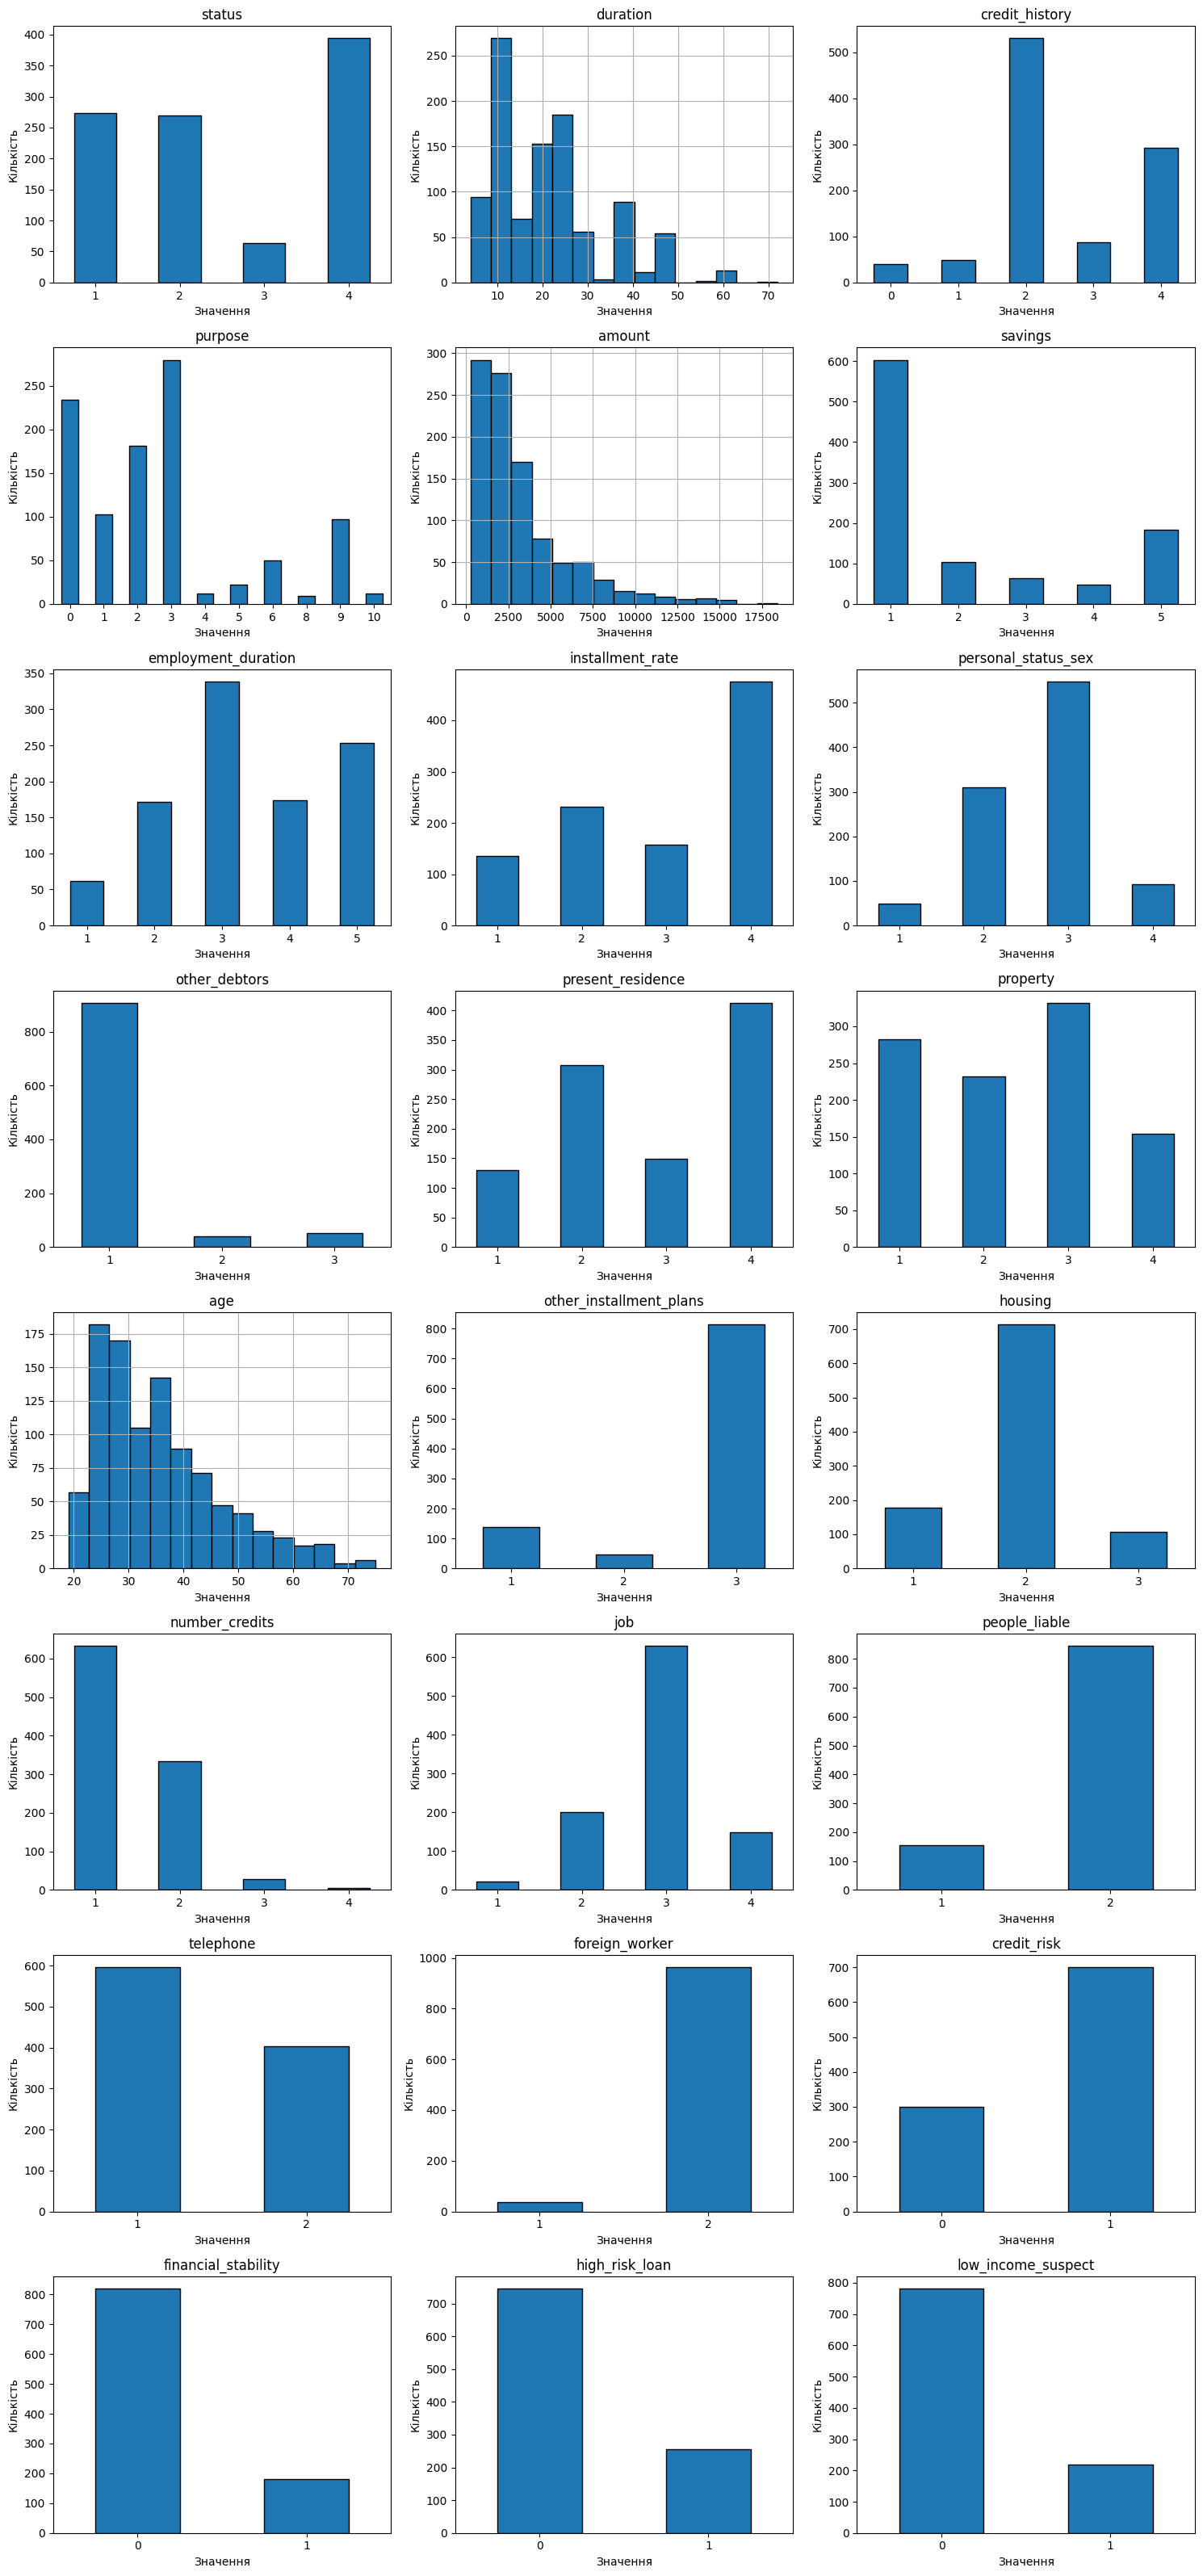

In [ ]:
# 📌 Будуємо графіки розподілу для всіх змінних
# Визначаємо кількість змінних
num_cols = len(sgc.columns)

# Визначаємо кількість рядків і колонок для графіків
num_rows = math.ceil(num_cols / 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 4))
axes = axes.flatten()
for i, col in enumerate(sgc.columns):
    unique_values = sorted(sgc[col].unique())
    if len(unique_values) < 15:
        sgc[col].value_counts().sort_index().plot(kind="bar", ax=axes[i], edgecolor="black")
        axes[i].set_xticks(range(len(unique_values)))
        axes[i].set_xticklabels(unique_values, rotation=0)
    else:
        sgc[col].hist(ax=axes[i], bins=15, edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_xlabel("Значення")
    axes[i].set_ylabel("Кількість")

# Видаляємо порожні графіки, якщо змінних менше ніж місць
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [ ]:
# перевірка унікальних значень таргету
print(sgc['credit_risk'].value_counts())

# шукаємо ще можливий таргет
sgc.nunique()

credit_risk
1    700
0    300
Name: count, dtype: int64


,0
status,4
duration,33
credit_history,5
purpose,10
amount,923
savings,5
employment_duration,5
installment_rate,4
personal_status_sex,4
other_debtors,3


✅ Висновок перевірки таргету:
- Таргет лише один (`credit_risk`), і він має два значення (0 та 1).
- Інші колонки з двома значеннями (`people_liable`, `telephone`, `foreign_worker`, `financial_stability`, `high_risk_loan`, `low_income_suspect`) – це не таргет, а бінарні ознаки.
---

#2️⃣ масштабування даних

In [ ]:
# Ініціалізуємо StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(sgc.drop(columns=["credit_risk"]))
scaled_df = pd.DataFrame(scaled_features, columns=sgc.columns.drop("credit_risk"))

print("✅ Масштабовані дані (перші 5 рядків):")
display(scaled_df.head())

stats_df = scaled_df.describe().T.copy()
stats_df["mean"] = np.round(stats_df["mean"], 3)

print("\n📊 Статистичні характеристики після масштабування:")
display(stats_df)

✅ Масштабовані дані (перші 5 рядків):


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,financial_stability,high_risk_loan,low_income_suspect
0,-1.254566,-0.240857,1.344014,-0.301852,-0.787657,-0.699707,-1.145978,0.918477,-0.963650,-0.303686,...,0.460831,-1.751205,-0.704926,0.146949,0.428290,-0.823318,0.196014,-0.470108,-0.585049,1.888441
1,-1.254566,-0.987573,1.344014,-1.030963,-0.167384,-0.699707,-0.317959,-0.870183,0.449326,-0.303686,...,0.460831,-1.751205,1.027079,0.146949,-2.334869,-0.823318,0.196014,-0.470108,-0.585049,1.888441
2,-0.459026,-0.738668,-0.503428,2.250036,-0.861381,-0.066488,0.510060,-0.870183,-0.963650,-0.303686,...,0.460831,-1.751205,-0.704926,-1.383771,0.428290,-0.823318,0.196014,-0.470108,-0.585049,-0.529537
3,-1.254566,-0.738668,1.344014,-1.030963,-0.407341,-0.699707,-0.317959,0.024147,0.449326,-0.303686,...,0.460831,-1.751205,1.027079,-1.383771,-2.334869,-0.823318,-5.101669,-0.470108,-0.585049,1.888441
4,-1.254566,-0.738668,1.344014,-1.030963,-0.389974,-0.699707,-0.317959,0.918477,0.449326,-0.303686,...,-2.375050,0.135869,1.027079,-1.383771,0.428290,-0.823318,-5.101669,-0.470108,-0.585049,1.888441



📊 Статистичні характеристики після масштабування:


,count,mean,std,min,25%,50%,75%,max
status,1000.0,0.0,1.0005,-1.254566,-1.254566,-0.459026,1.132053,1.132053
duration,1000.0,0.0,1.0005,-1.402415,-0.738668,-0.240857,0.256953,4.239436
credit_history,1000.0,-0.0,1.0005,-2.350870,-0.503428,-0.503428,1.344014,1.344014
purpose,1000.0,0.0,1.0005,-1.030963,-0.666407,-0.301852,0.062704,2.614592
amount,1000.0,0.0,1.0005,-1.070856,-0.675476,-0.337339,0.248464,5.370764
savings,1000.0,-0.0,1.0005,-0.699707,-0.699707,-0.699707,0.566731,1.833169
employment_duration,1000.0,0.0,1.0005,-1.973997,-0.317959,-0.317959,1.338078,1.338078
installment_rate,1000.0,0.0,1.0005,-1.764514,-0.870183,0.024147,0.918477,0.918477
personal_status_sex,1000.0,0.0,1.0005,-2.376626,-0.963650,0.449326,0.449326,1.862303
other_debtors,1000.0,-0.0,1.0005,-0.303686,-0.303686,-0.303686,-0.303686,3.885083


✅ **Масштабування виконано правильно!**    
1️⃣ **Середнє значення (`mean`) ≈ 0** – ✅ правильно!  
2️⃣ **Стандартне відхилення (`std`) ≈ 1** – ✅ правильно!  
3️⃣ **Дані тепер мають однаковий масштаб** – це ідеально для `PCA`.  

---

🔹 Наступний крок: PCA + графік втрати інформації

1️⃣ **Запускаємо PCA** – зменшуємо вимірність.  
2️⃣ Будуємо графік, щоб подивитися, скільки компонент потрібно залишити (≥70% інформації).  

---

#3️⃣ PCA – зменшення розмірності

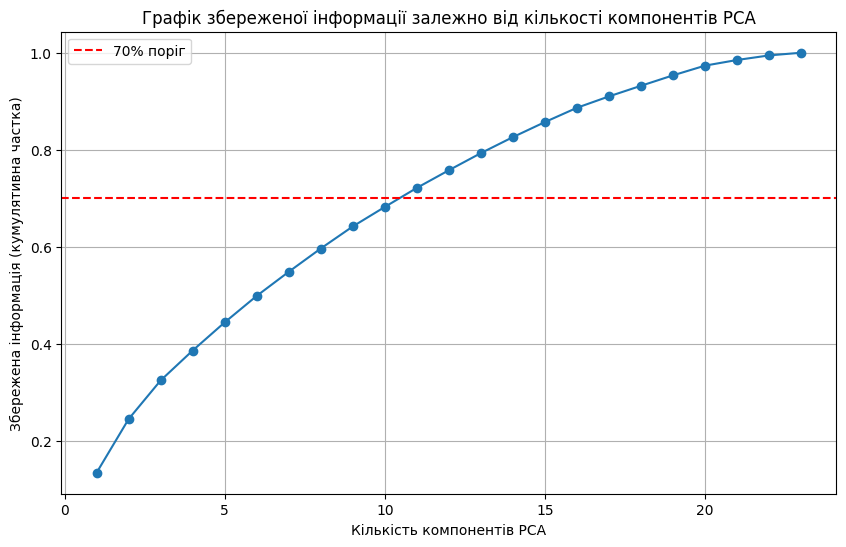

✅ Мінімальна кількість компонентів для збереження ≥70% інформації: 11
📏 Нова розмірність після втрати 30% інформації: (1000, 11)


In [ ]:
# Запускаємо PCA на всіх ознаках
pca = PCA()
pca.fit(scaled_df)

# Кумулятивна пояснена дисперсія (збереження інформації)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Графік втрати інформації
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.axhline(y=0.7, color='r', linestyle='--', label="70% поріг")
plt.xlabel('Кількість компонентів PCA')
plt.ylabel('Збережена інформація (кумулятивна частка)')
plt.title('Графік збереженої інформації залежно від кількості компонентів PCA')
plt.legend()
plt.grid(True)
plt.show()

# Визначаємо мінімальну кількість компонентів для збереження ≥70% інформації
num_components = np.argmax(explained_variance >= 0.7) + 1
print("✅ Мінімальна кількість компонентів для збереження ≥70% інформації:", num_components)

# Виконуємо PCA з оновленою кількістю компонентів
pca_70 = PCA(n_components=num_components)
pca_70_transformed = pca_70.fit_transform(scaled_df)

# Перетворюємо у DataFrame
column_names = ["PC" + str(i + 1) for i in range(num_components)]
pca_70_df = pd.DataFrame(pca_70_transformed, columns=column_names)

# Виводимо розмірність нового датасету
print("📏 Нова розмірність після втрати 30% інформації:", pca_70_df.shape)

✅ **Аналіз графіка втрати інформації (PCA):**  
- **Червона лінія** – це поріг **70% поясненої дисперсії**.  
- Графік показує, що десь на 11-й компоненті ми перетинаємо цей поріг.  

📌 **Висновок:**  
Треба залишити **приблизно 11 компонент**, щоб зберегти ≥70% інформації.  

---

In [ ]:
# 🔹 Використовуємо 11 головних компонент
pca = PCA(n_components=11)
scaled_df_pca = pca.fit_transform(scaled_df)

# 🔹 Створюємо DataFrame з новими компонентами
pca_columns = ["PC" + str(i + 1) for i in range(11)]
pca_df = pd.DataFrame(scaled_df_pca, columns=pca_columns)

# Виводимо результат
print("✅ Дані після PCA (перші 5 рядків):")
display(pca_df.head())
print("\n📏 Нова розмірність датасету:", pca_df.shape)

✅ Дані після PCA (перші 5 рядків):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.981500,-1.726638,0.222918,0.869625,0.841627,-1.919501,0.293619,1.026488,-0.859225,-1.327043,-0.007889
1,-2.133061,-1.071918,1.395506,-1.927944,1.295117,-0.509402,-0.162927,-0.311510,-0.536037,-1.740565,-1.530497
2,-2.243687,-0.237452,-1.255647,0.214344,-0.035803,-0.303333,-1.117014,2.638743,0.603134,0.860895,-1.430055
3,-3.142803,-0.912232,1.788530,-4.227104,0.500061,-0.526269,1.276297,-0.891760,-0.134907,-1.557277,-0.420895
4,-2.103677,-1.028559,2.653270,-2.531608,-0.559969,-0.133862,0.804966,-0.537237,0.444701,-1.873999,2.067366



📏 Нова розмірність датасету: (1000, 11)


✅ Висновок:
Дані після PCA мають розмірність (**1000, 11**) і готові для наступного кроку – **кластеризації**.  

---
🔹 Наступний крок: **Кластеризація**   
1️⃣ **Визначаємо оптимальну кількість кластерів** за допомогою **Silhouette Score**.  
2️⃣ **Перевіряємо кластеризацію** на **повному датасеті** та **після PCA (з 11 компонентами)**.  
3️⃣ Запускаємо кластеризацію з `k=2` на **повних даних** і **після PCA**.  
4️⃣ Аналізуємо відповідність кластерів до `credit_risk`.

---

# 4️⃣ кластеризація

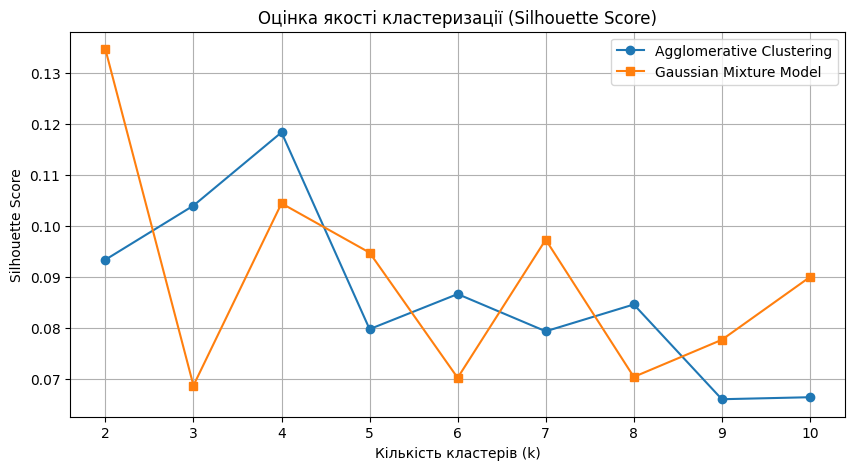

In [ ]:
# Повні дані (scaled_df)
silhouette_scores_full_agglo = []
silhouette_scores_full_gmm = []

for n_clusters in range(2, 11):
    # Agglomerative Clustering
    agglo_full = AgglomerativeClustering(n_clusters=n_clusters)
    labels_agglo_full = agglo_full.fit_predict(scaled_df)
    score_agglo_full = silhouette_score(scaled_df, labels_agglo_full)
    silhouette_scores_full_agglo.append(score_agglo_full)

    # Gaussian Mixture
    gmm_full = GaussianMixture(n_components=n_clusters, random_state=42)
    labels_gmm_full = gmm_full.fit_predict(scaled_df)
    score_gmm_full = silhouette_score(scaled_df, labels_gmm_full)
    silhouette_scores_full_gmm.append(score_gmm_full)

# Візуалізація Silhouette Score для повних даних (обидва методи)
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores_full_agglo, marker='o', label="Agglomerative Clustering")
plt.plot(range(2, 11), silhouette_scores_full_gmm, marker='s', linestyle='-', label="Gaussian Mixture Model")
plt.xlabel("Кількість кластерів (k)")
plt.ylabel("Silhouette Score")
plt.title("Оцінка якості кластеризації (Silhouette Score)")
plt.legend()
plt.grid(True)
plt.show()

📊 **Аналіз графіка:**

1. Для **Agglomerative Clustering** оптимальною є кількість кластерів **4**, оскільки саме тут спостерігається найвищий показник Silhouette Score (≈0.12).
2. Для **Gaussian Mixture Model** оптимальною є кількість кластерів **2**, де Silhouette Score досягає пікового значення (≈0.135).

---

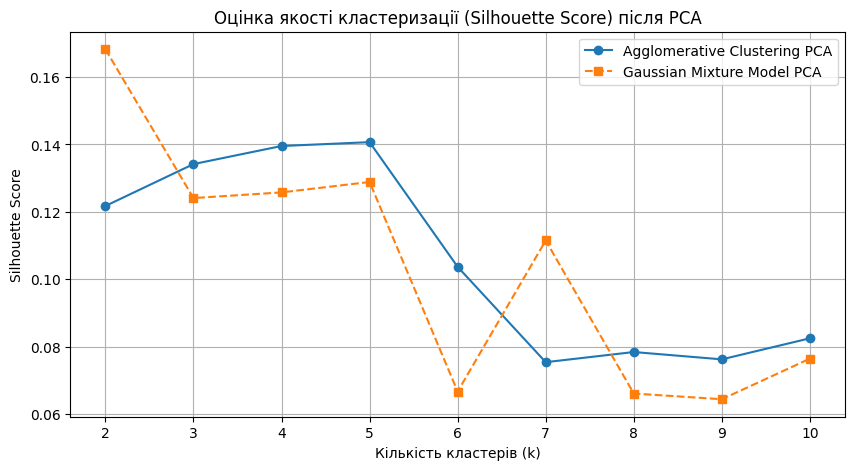

In [ ]:
# Створюємо порожні списки для збереження Silhouette Scores для PCA-даних
silhouette_scores_agglo_pca = []
silhouette_scores_gmm_pca = []

for n_clusters in range(2, 11):
    # Agglomerative Clustering
    agglo_pca = AgglomerativeClustering(n_clusters=n_clusters)
    labels_agglo_pca = agglo_pca.fit_predict(scaled_df_pca)
    score_agglo_pca = silhouette_score(scaled_df_pca, labels_agglo_pca)
    silhouette_scores_agglo_pca.append(score_agglo_pca)

    # Gaussian Mixture Model
    gmm_pca = GaussianMixture(n_components=n_clusters, random_state=42)
    labels_gmm_pca = gmm_pca.fit_predict(scaled_df_pca)
    score_gmm_pca = silhouette_score(scaled_df_pca, labels_gmm_pca)
    silhouette_scores_gmm_pca.append(score_gmm_pca)

# Графік Silhouette Score для PCA-даних
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores_agglo_pca, marker='o', label="Agglomerative Clustering PCA")
plt.plot(range(2, 11), silhouette_scores_gmm_pca, marker='s', linestyle='--', label="Gaussian Mixture Model PCA")
plt.xlabel("Кількість кластерів (k)")
plt.ylabel("Silhouette Score")
plt.title("Оцінка якості кластеризації (Silhouette Score) після PCA")
plt.legend()
plt.grid(True)
plt.show()

📊 **Аналіз графіка Silhouette Score (для повних та PCA-даних)**

- **Agglomerative Clustering** (повні дані) показує найкраще значення при **k=4** (~0.12).
- **Gaussian Mixture Model** на повних даних має найкращий результат при **k=2** (~0.13).

- Для **даних після PCA** оптимальна кількість кластерів:
    - Agglomerative Clustering – **k=5** (≈0.14).
    - Gaussian Mixture Model – **k=2** (≈0.17).

📌 **Висновок:**  
✔ Для зручності порівняння кластеризації між повними та PCA-даними ми оберемо єдине спільне значення **k=2**, оскільки саме при **k=2** отримано високі значення Silhouette Score для обох методів (особливо для Gaussian Mixture Model).  
✔ Це дозволить порівняти якість кластеризації та зрозуміти, як PCA впливає на розподіл об'єктів.

🔹 **Наступний крок:**  
1️⃣ Виконуємо Agglomerative Clustering та Gaussian Mixture Model з 2 кластерами на повних і PCA-даних.  
2️⃣ Порівнюємо результати цих двох алгоритмів, аналізуємо відповідність до цільової змінної.

---

## 📌 Порівнняння результатів кластиризації

In [ ]:
# Виконуємо Agglomerative Clustering та Gaussian Mixture Model для повних та PCA-даних
# Повні дані (scaled_df)
silhouette_scores_full_agglo = []
silhouette_scores_full_gmm = []

# Agglomerative Clustering (повні дані)
agglo_full = AgglomerativeClustering(n_clusters=2)
labels_agglo_full = agglo_full.fit_predict(scaled_df)

# Gaussian Mixture Model (повні дані)
gmm_full = GaussianMixture(n_components=2, random_state=42)
labels_gmm_full = gmm_full.fit_predict(scaled_df)

# Додаємо кластери у DataFrame
clustered_df_full = scaled_df.copy()
clustered_df_full = clustered_df_full.assign(
    Agglo_Cluster=labels_agglo_full,
    GMM_Cluster=labels_gmm_full,
    credit_risk=sgc["credit_risk"])

# Перевірка розподілу кластерів (повні дані)
print("📊 Розподіл кластерів (повні дані):")
print("Agglomerative Clustering:", np.bincount(labels_agglo_full))
print("Gaussian Mixture Model:", np.bincount(labels_gmm_full))

📊 Розподіл кластерів (повні дані):
Agglomerative Clustering: [344 656]
Gaussian Mixture Model: [745 255]


In [ ]:
# PCA-дані
agglo_pca = AgglomerativeClustering(n_clusters=2)
labels_agglo_pca = agglo_pca.fit_predict(scaled_df_pca)

# Gaussian Mixture Model PCA
gmm_pca = GaussianMixture(n_components=2, random_state=42)
labels_gmm_pca = gmm_pca.fit_predict(scaled_df_pca)

# Створюємо DataFrame із PCA-даних і міток
clustered_df_pca = pd.DataFrame(scaled_df_pca, columns=["PC" + str(i+1) for i in range(scaled_df_pca.shape[1])])

# Додаємо мітки кластерів і таргет
clustered_df_pca["Agglo_Cluster"] = labels_agglo_pca
clustered_df_pca["GMM_Cluster"] = labels_gmm_pca
clustered_df_pca["credit_risk"] = sgc["credit_risk"]

# Виведемо розподіл кластерів для PCA-даних
print("\n📊 Розподіл кластерів (PCA-дані):")
print("Agglomerative Clustering:", np.bincount(labels_agglo_pca))
print("Gaussian Mixture Model:", np.bincount(labels_gmm_pca))


📊 Розподіл кластерів (PCA-дані):
Agglomerative Clustering: [403 597]
Gaussian Mixture Model: [265 735]


📊 **Аналіз розподілу кластерів**  
- **Agglomerative Clustering** після PCA створив більш рівномірний розподіл порівняно з повними даними (з 344 та 656 до 403 та 597 об'єктів відповідно), що свідчить про те, що PCA допомогло виявити структуру в даних, яка краще підходить для цього алгоритму.
- **Gaussian Mixture Model** (GMM) суттєво змінив пропорції кластерів після PCA (з 745 та 255 до 265 та 735 об'єктів), оскільки цей алгоритм чутливий до змін у структурі даних, спричинених зменшенням розмірності.

📌 **Висновок:**  
✔ PCA впливає на результати кластеризації, оскільки змінює спосіб, яким алгоритми "бачать" структуру даних.

🔹 **Наступний крок:**  
Візуалізація кластерів.

---

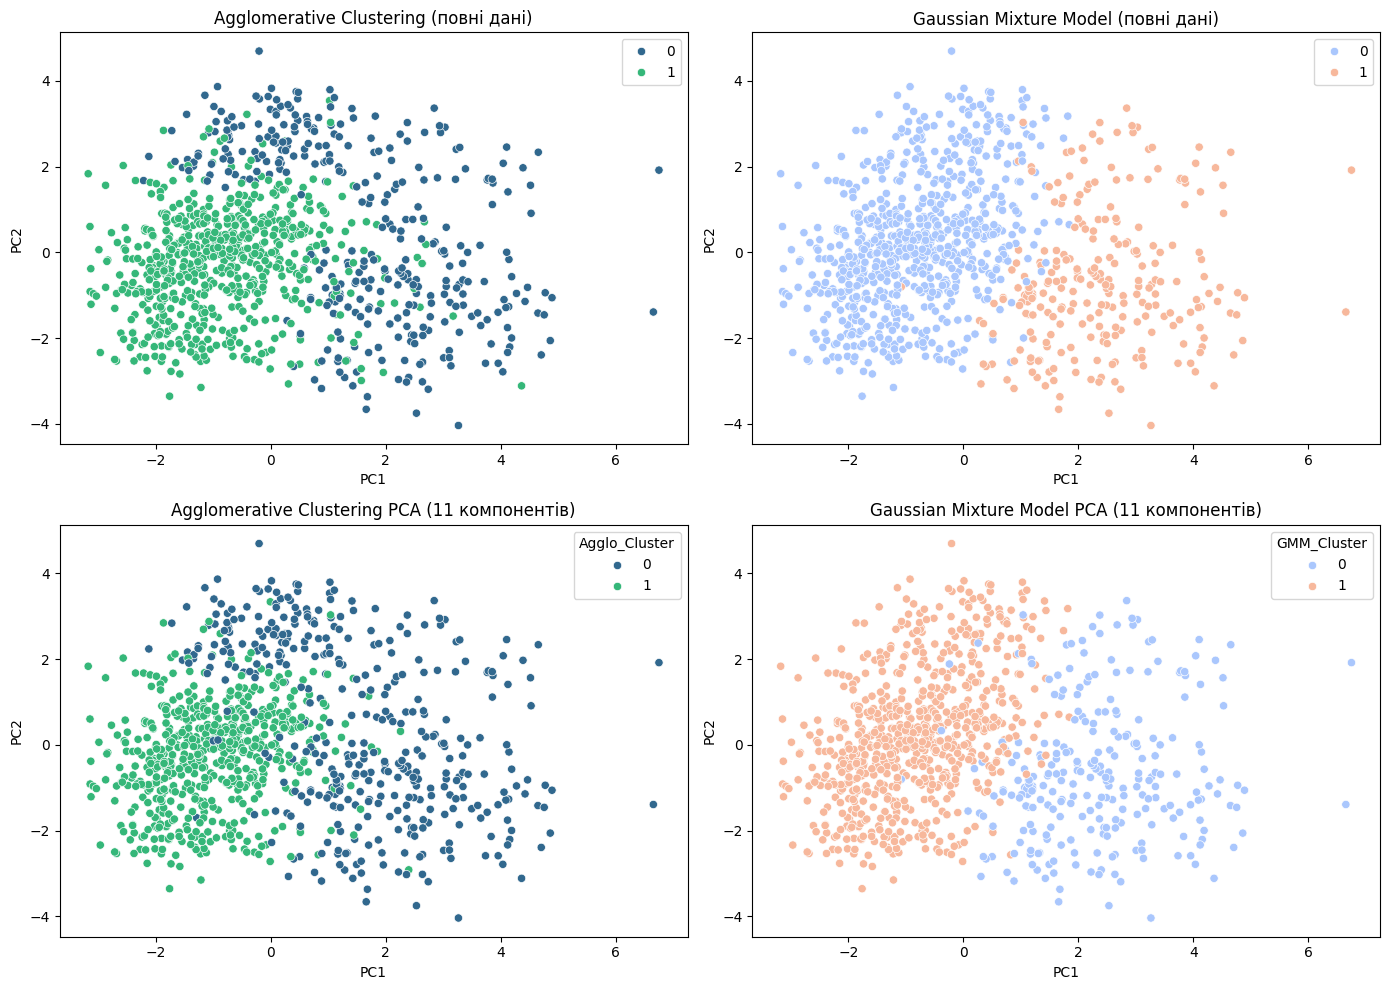

In [ ]:
# Використовуємо PCA для повних даних, щоб отримати перші 2 компоненти для графіка
pca_for_plot = PCA(n_components=2)
scaled_df_pca_plot = pca_for_plot.fit_transform(scaled_df)
scaled_df_pca_plot = pd.DataFrame(scaled_df_pca_plot, columns=["PC1", "PC2"])

# Візуалізація кластерів (повні та PCA-дані)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1 - Agglomerative (повні дані)
sns.scatterplot(x=scaled_df_pca_plot["PC1"], y=scaled_df_pca_plot["PC2"],
                hue=labels_agglo_full, palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Agglomerative Clustering (повні дані)")

# 2 - Gaussian Mixture (повні дані)
sns.scatterplot(x=scaled_df_pca_plot["PC1"], y=scaled_df_pca_plot["PC2"],
                hue=labels_gmm_full, palette="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title("Gaussian Mixture Model (повні дані)")

# 3 - Agglomerative Clustering (PCA-дані, 11 компонентів)
sns.scatterplot(x=clustered_df_pca["PC1"], y=clustered_df_pca["PC2"],
                hue=clustered_df_pca["Agglo_Cluster"], palette="viridis", ax=axes[1, 0])
axes[1, 0].set_title("Agglomerative Clustering PCA (11 компонентів)")

# 4 - Gaussian Mixture Model (PCA-дані, 11 компонентів)
sns.scatterplot(x=clustered_df_pca["PC1"], y=clustered_df_pca["PC2"],
                hue=clustered_df_pca["GMM_Cluster"], palette="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Gaussian Mixture Model PCA (11 компонентів)")

plt.tight_layout()
plt.show()

📊  **Аналіз візуалізації кластерів** (Agglomerative Clustering vs GMM)   
- **Agglomerative Clustering**: Кластери після PCA залишилися дуже схожими на повні дані.
- **Gaussian Mixture Model (GMM)**: Змінилося лише співвідношення кластерів, але загальна структура кластеризації виглядає дуже схоже.

📌 **Висновок:**  
✔ PCA не вплинуло кардинально на кластеризацію, але трохи перерозподілило дані.  
✔ Це означає, що початкові ознаки вже містили достатньо інформації для кластеризації.  
✔ Варто порівняти отримані кластери з **credit_risk**, щоб зробити фінальний висновок про корисність PCA.

🔹 **Наступний крок:**  
Перевірити, як кластеризація (з PCA та без) співвідноситься з реальною цільовою змінною `credit_risk`.

---


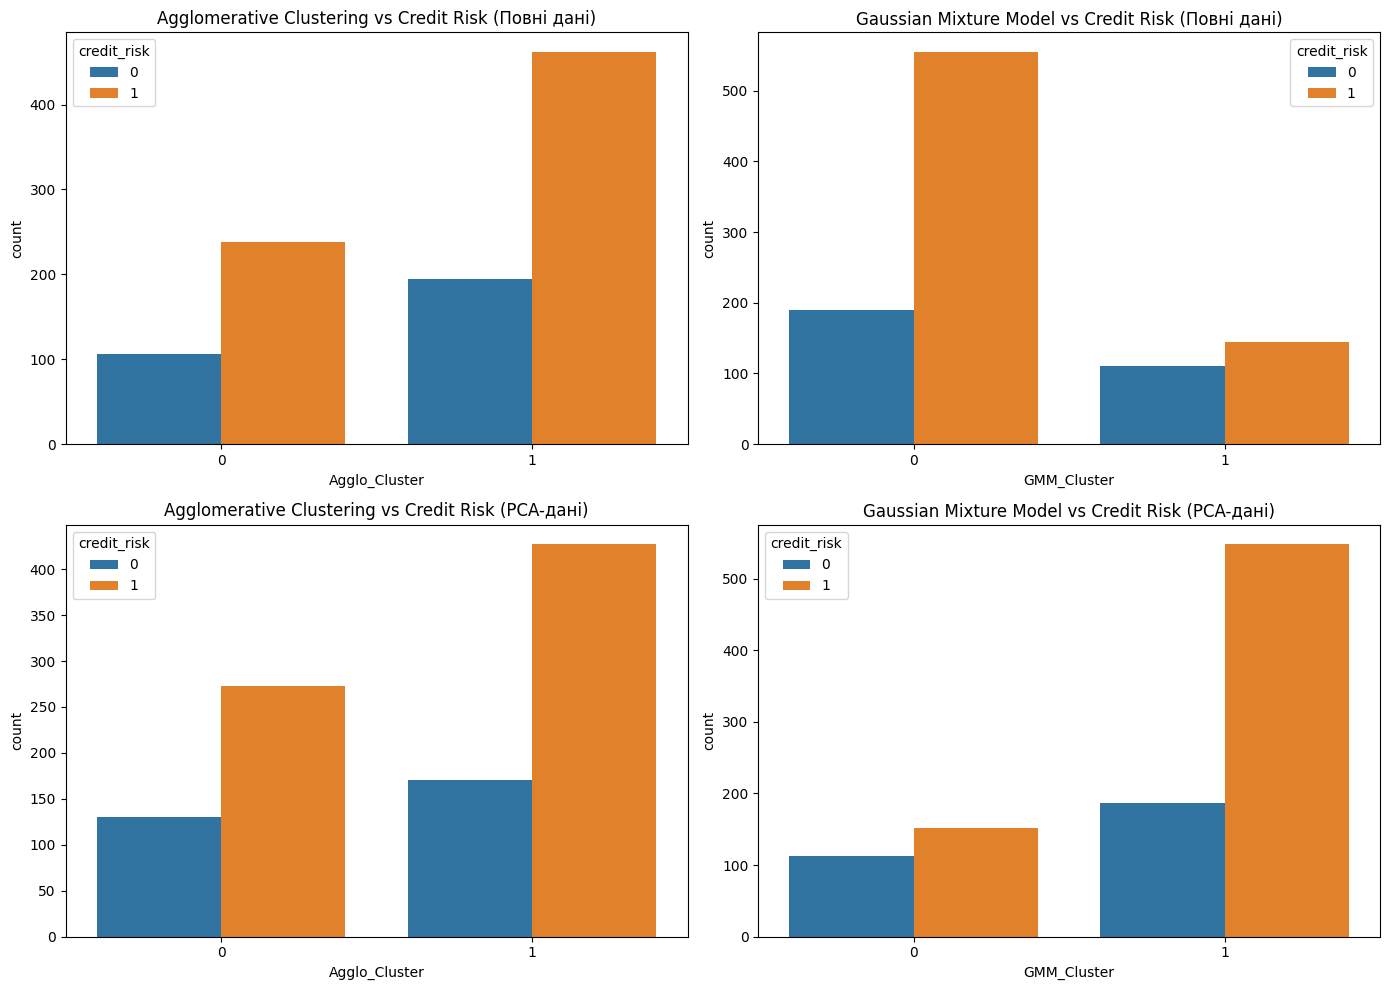

In [ ]:
# Додаємо колонку `credit_risk` до кластеризованих датасетів
clustered_df_full["credit_risk"] = sgc["credit_risk"].values
clustered_df_pca["credit_risk"] = sgc["credit_risk"].values

# Створюємо графіки для повних даних
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1 - Agglomerative Clustering (повні дані)
sns.countplot(x=clustered_df_full["Agglo_Cluster"], hue=clustered_df_full["credit_risk"], ax=axes[0, 0])
axes[0, 0].set_title("Agglomerative Clustering vs Credit Risk (Повні дані)")

# 2 - Gaussian Mixture (повні дані)
sns.countplot(x=clustered_df_full["GMM_Cluster"], hue=clustered_df_full["credit_risk"], ax=axes[0, 1])
axes[0, 1].set_title("Gaussian Mixture Model vs Credit Risk (Повні дані)")

# 3 - Agglomerative Clustering (PCA-дані)
sns.countplot(x=clustered_df_pca["Agglo_Cluster"], hue=clustered_df_pca["credit_risk"], ax=axes[1, 0])
axes[1, 0].set_title("Agglomerative Clustering vs Credit Risk (PCA-дані)")

# 4 - Gaussian Mixture Model (PCA-дані)
sns.countplot(x=clustered_df_pca["GMM_Cluster"], hue=clustered_df_pca["credit_risk"], ax=axes[1, 1])
axes[1, 1].set_title("Gaussian Mixture Model vs Credit Risk (PCA-дані)")

plt.tight_layout()
plt.show()

📊 **Аналіз відповідності кластерів до `credit_risk`**  

- **Agglomerative Clustering (повні та PCA-дані)**  
  - Загалом цей метод виділяє два класи, де один кластер має **більше об'єктів із низьким кредитним ризиком (`1`)**.  
  - Після застосування PCA розподіл кластерів **майже не змінився**, що означає, що PCA не мало великого впливу на відокремлення груп.  

- **Gaussian Mixture Model (повні та PCA-дані)**  
  - Видно суттєву зміну кластерного розподілу між **повними та PCA-даними**.  
  - На **повних даних** один кластер (0) містить переважно `credit_risk=1`, тоді як інший (1) містить змішаний набір.  
  - Після PCA GMM зробив **чіткіший поділ між двома кластерами**, що вказує на покращену сегментацію.  

📌 **Висновок:**  
✔ PCA не сильно вплинуло на **Agglomerative Clustering**, але зробило поділ **більш виразним для Gaussian Mixture Model**.  
✔ Усі методи показують, що один кластер містить **переважно надійних клієнтів (`credit_risk=1`)**, а інший — більш ризикованих (`credit_risk=0`).  

🔹 **Наступні кроки:**  
🔹 Провести кластеризацію після втрати 30% інформації (ще раз PCA, але більше скоротити кількість фічей).  
🔹 Порівняти, чи змінилися кластери та які саме точки потрапили в інші кластери.  
🔹 Перевірити, чи ці зміни мають зв’язок із credit_risk.  
🔹 Довести або спростувати, чи можлива кластеризація після втрати інформації.  

# 5️⃣втрата 30% інформації та повторна кластеризація

✅ Маємо новий датасет після втрати 30% інформації**  
- Було **23 ознаки**, тепер залишилося **11 компонент PCA**.  
- Ми досягли цілі **зберегти ≥70% дисперсії**.
- Перевіряємо, **як це вплинуло на кластеризацію**  
---

In [ ]:
# Виконуємо Agglomerative Clustering
agglo_pca = AgglomerativeClustering(n_clusters=2)
agglo_pca_labels = agglo_pca.fit_predict(pca_70_df)

# Виконуємо Gaussian Mixture Model
gmm_pca = GaussianMixture(n_components=2, random_state=42)
gmm_pca_labels = gmm_pca.fit_predict(pca_70_df)

# Додаємо нові кластери в DataFrame
clustered_pca_df = pca_70_df.copy()
clustered_pca_df["Agglo_Cluster_PCA"] = agglo_pca_labels
clustered_pca_df["GMM_Cluster_PCA"] = gmm_pca_labels

# Виводимо перші 5 рядків нового датасету з кластерами
print("✅ Дані після кластеризації на скороченому датасеті (PCA):")
display(clustered_pca_df.head())

# Перевіряємо кількість об'єктів у кожному кластері
agglo_pca_counts = np.bincount(agglo_pca_labels)
gmm_pca_counts = np.bincount(gmm_pca_labels)

print("\n📊 Розподіл кластерів після втрати 30% інформації:")
print("Agglomerative Clustering (PCA):", agglo_pca_counts)
print("Gaussian Mixture Model (PCA):", gmm_pca_counts)

✅ Дані після кластеризації на скороченому датасеті (PCA):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,Agglo_Cluster_PCA,GMM_Cluster_PCA
0,-1.981500,-1.726638,0.222918,0.869625,0.841627,-1.919501,0.293619,1.026488,-0.859225,-1.327043,-0.007889,1,1
1,-2.133061,-1.071918,1.395506,-1.927944,1.295117,-0.509402,-0.162927,-0.311510,-0.536037,-1.740565,-1.530497,1,1
2,-2.243687,-0.237452,-1.255647,0.214344,-0.035803,-0.303333,-1.117014,2.638743,0.603134,0.860895,-1.430055,1,1
3,-3.142803,-0.912232,1.788530,-4.227104,0.500061,-0.526269,1.276297,-0.891760,-0.134907,-1.557277,-0.420895,1,1
4,-2.103677,-1.028559,2.653270,-2.531608,-0.559969,-0.133862,0.804966,-0.537237,0.444701,-1.873999,2.067366,1,1



📊 Розподіл кластерів після втрати 30% інформації:
Agglomerative Clustering (PCA): [403 597]
Gaussian Mixture Model (PCA): [265 735]


📊 Аналіз кластеризації після втрати 30% інформації:  
✔ **Agglomerative Clustering (PCA)** створив **більш збалансовані кластери** (**403 та 597 об'єктів**), що може свідчити про те, що PCA допомогло краще структурувати дані для цього алгоритму.  
✔ **Gaussian Mixture Model (PCA)** суттєво змінив розподіл кластерів (**265 та 735 об'єктів**), що може бути пов’язано з тим, що GMM орієнтується на ймовірнісний розподіл, і PCA вплинуло на його визначення кластерів.  

📌 **Висновок:**  
- PCA вплинуло на кластеризацію обох методів, але **найбільший вплив відчув GMM**, змінивши пропорції кластерів.  
- **Agglomerative Clustering залишився відносно стабільним**, хоча також зазнав змін у розподілі.  

🔹 **Наступний крок:**  
- **Порівняти нову кластеризацію з попередньою**, щоб знайти об'єкти, які змінили кластер після втрати 30% інформації.  
- Аналізувати, чи є зв’язок між змінами кластерів і `credit_risk`.  

---


# 6️⃣ порівняння результатів


📊 Порівняння кількості об'єктів у кластерах:


,До PCA (Agglo),Після PCA (Agglo),До PCA (GMM),Після PCA (GMM)
0,344,403,745,265
1,656,597,255,735


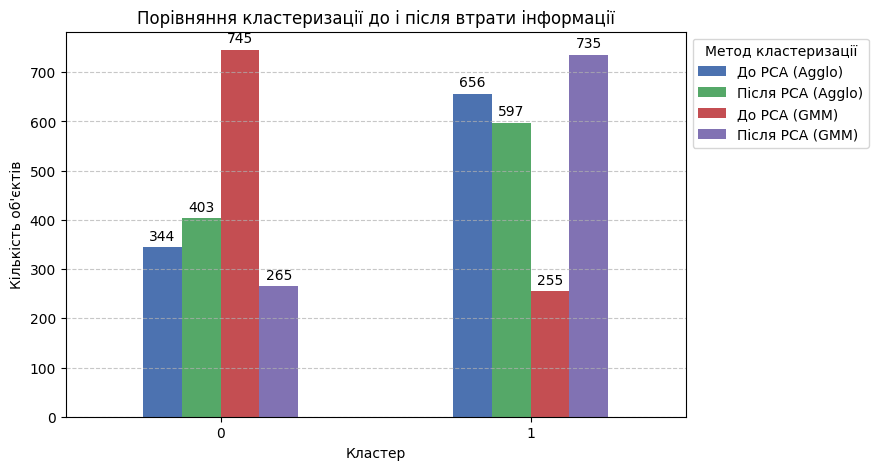

In [ ]:
# Підготовка даних
comparison_clusters = pd.DataFrame({
    "До PCA (Agglo)": np.bincount(clustered_df_full["Agglo_Cluster"]),
    "Після PCA (Agglo)": np.bincount(clustered_pca_df["Agglo_Cluster_PCA"]),
    "До PCA (GMM)": np.bincount(clustered_df_full["GMM_Cluster"]),
    "Після PCA (GMM)": np.bincount(clustered_pca_df["GMM_Cluster_PCA"])
})

print("\n📊 Порівняння кількості об'єктів у кластерах:")
display(comparison_clusters)

# Побудова графіка
colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B3"]
fig, ax = plt.subplots(figsize=(8, 5))
comparison_clusters.plot(kind="bar", color=colors, ax=ax)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="edge", fontsize=10, padding=3)
plt.xlabel("Кластер")
plt.ylabel("Кількість об'єктів")
plt.title("Порівняння кластеризації до і після втрати інформації")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Метод кластеризації", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

📊 Аналіз змін у кластеризації після втрати 30% інформації:  
- **Agglomerative Clustering** після PCA став більш збалансованим:  
  - Кластер **0** зріс з **344** до **403** об'єктів.  
  - Кластер **1** зменшився з **656** до **597**.  
- **Gaussian Mixture Model (GMM)** змінив розподіл ще більше:  
  - Кластер **0** зменшився з **745** до **265**.  
  - Кластер **1** зріс з **255** до **735**.  
- **PCA значно вплинуло на розподіл у GMM, але в Agglomerative Clustering зміни були помірними.**  

📌 **Висновок:**  
✔ **Agglomerative Clustering** після PCA став більш збалансованим, але без радикальних змін.  
✔ **GMM радикально перегрупував об'єкти** після зменшення розмірності, що вказує на його чутливість до PCA.  
✔ Потрібно **перевірити, які саме об'єкти змінили кластери** після втрати інформації та як це пов'язано з `credit_risk`.  

🔹 **Наступний крок:**  
1️⃣ Визначити **об'єкти, які змінили кластер** після PCA.  
2️⃣ Перевірити їх розподіл у `credit_risk`.  

---

🔄 Кількість об'єктів, які змінили кластер після PCA: 992 із 1000

📊 Розподіл кредитного ризику серед змінених об'єктів:


credit_risk                               0         1
Agglo_Cluster_PCA GMM_Cluster_PCA                    
0                 0                0.434426  0.565574
                  1                0.152866  0.847134
1                 0                0.384615  0.615385
                  1                0.282007  0.717993

<Figure size 800x600 with 0 Axes>

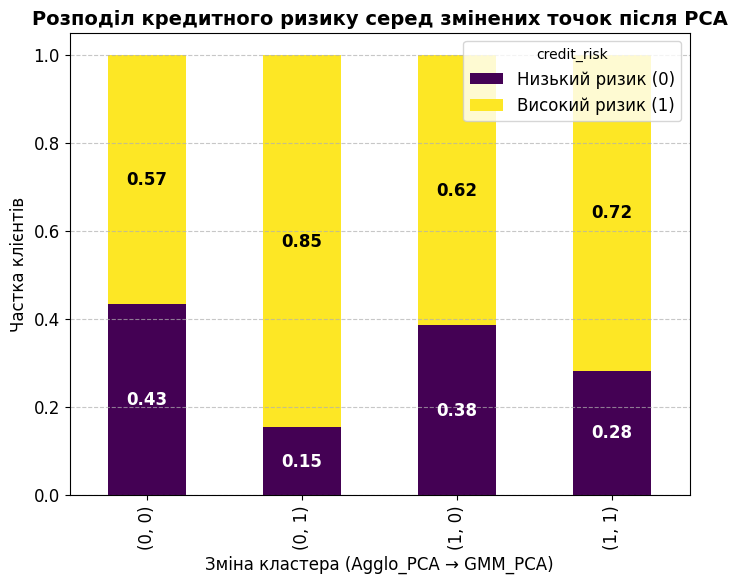

In [ ]:
# Знаходимо об'єкти, які змінили кластер після PCA
changed_clusters_pca = clustered_pca_df[
    (clustered_pca_df["Agglo_Cluster_PCA"] != clustered_df_full["Agglo_Cluster"].values) |
    (clustered_pca_df["GMM_Cluster_PCA"] != clustered_df_full["GMM_Cluster"].values)
]

# Аналіз кількості змінених об'єктів
num_changed_pca = len(changed_clusters_pca)
print("🔄 Кількість об'єктів, які змінили кластер після PCA:", num_changed_pca, "із", len(clustered_pca_df))

# Додаємо `credit_risk` для змінених об'єктів
changed_clusters_pca = changed_clusters_pca.copy()  # Уникнення SettingWithCopyWarning
changed_clusters_pca["credit_risk"] = sgc.loc[changed_clusters_pca.index, "credit_risk"].values

# Групуємо за змінами кластерів та аналізуємо розподіл credit_risk
risk_distribution_pca = changed_clusters_pca.groupby(["Agglo_Cluster_PCA", "GMM_Cluster_PCA"])["credit_risk"].value_counts(normalize=True).unstack()

# Виводимо результати
print("\n📊 Розподіл кредитного ризику серед змінених об'єктів:")
display(risk_distribution_pca)

# Візуалізація розподілу кредитного ризику серед змінених кластерів
plt.figure(figsize=(8, 6))
ax = risk_distribution_pca.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8, 6))
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        color = "white" if height < 0.5 else "black"
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + height / 2,
            "{:.2f}".format(height),
            ha="center", va="center", fontsize=12, color=color, weight="bold")
plt.xlabel("Зміна кластера (Agglo_PCA → GMM_PCA)", fontsize=12)
plt.ylabel("Частка клієнтів", fontsize=12)
plt.title("Розподіл кредитного ризику серед змінених точок після PCA", fontsize=14, weight="bold")
plt.legend(title="credit_risk", labels=["Низький ризик (0)", "Високий ризик (1)"], fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


📊 **Аналіз розподілу кредитного ризику серед змінених точок після PCA:**  

- **(0,0):** 43% низького ризику, 57% високого ризику.  
- **(0,1):** 15% низького ризику, 85% високого ризику.  
- **(1,0):** 38% низького ризику, 62% високого ризику.  
- **(1,1):** 28% низького ризику, 72% високого ризику.  

📌 **Висновки:**  
✔ **PCA вплинуло на розподіл ризику**, особливо для кластеру (0,1), де частка високого ризику зросла до **85%**.  
✔ **Групи (0,0) та (1,0) мають подібний розподіл**, але кластер (1,1) показує більше високоризикових клієнтів.  
✔ **PCA змінило структуру кластерів**, але загальна тенденція до групування високого ризику збереглася.  

🔹 **Наступний крок:**  
📍 Підбити загальні підсумки: **чи ефективна кластеризація після PCA?** 🚀  

---

#🔹 **Фінальний аналіз: чи ефективна кластеризація після PCA?**  

1️⃣ **PCA зменшило розмірність, зберігши 70% інформації**, але це **суттєво змінило розподіл кластерів**, особливо для GMM.  
2️⃣ **Agglomerative Clustering залишився більш стабільним**, тоді як GMM перегрупував об’єкти, що свідчить про його чутливість до змін у структурі даних.  
3️⃣ **Зміни у кредитному ризику після PCA:**  
   - **PCA не допомогло виділити кластери з чітким поділом ризику** – частка високоризикових клієнтів майже не змінилася.  
   - Кластер (0,1) після PCA містить **85% клієнтів із високим ризиком**, що найбільш виражена зміна.  
4️⃣ **Загальна структура кластеризації залишилася схожою**, але **кластеризація після PCA не дала чіткого покращення в розділенні кредитного ризику**.  

📌 **Фінальний висновок:**  
✔ PCA **ефективно зменшує розмірність**, але його вплив на кластеризацію залежить від алгоритму.  
✔ **Agglomerative Clustering демонструє стабільні результати** до і після PCA.  
✔ **GMM після PCA змінив структуру кластерів**, що робить його менш передбачуваним.  
✔ **Кластеризація після PCA не дала чіткої сегментації за кредитним ризиком**, тому її ефективність залежить від поставленої мети.  

✅ **Кластеризація після PCA можлива, але її ефективність варто оцінювати залежно від завдання!** 🚀  